## Loading the dataset and exploring the variables

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df = df.drop(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'], axis=1)

In [6]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [8]:
df.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64

In [9]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

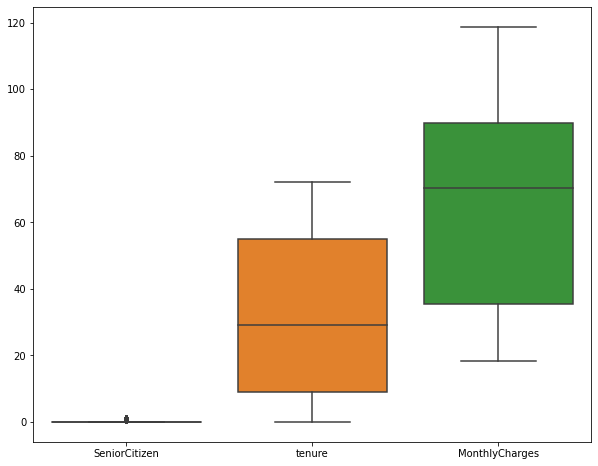

In [11]:
plt.figure(figsize = (10, 8))
sns.boxplot(data=df);

In [12]:
## No significant outliers

In [13]:
corr_matrix = df.corr()

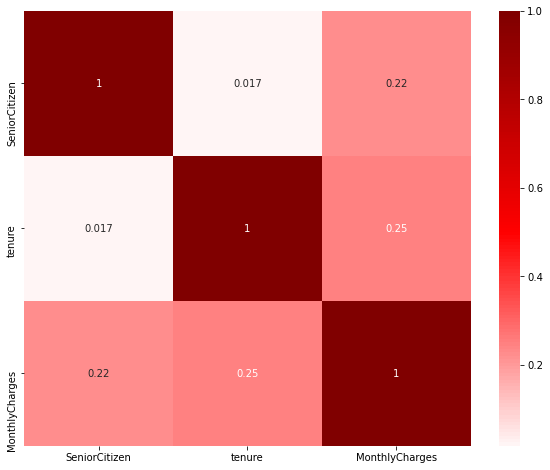

In [14]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, cmap ="seismic", center = 0, annot = True);

In [15]:
# There's no highly correlated variables

<Figure size 1440x576 with 0 Axes>

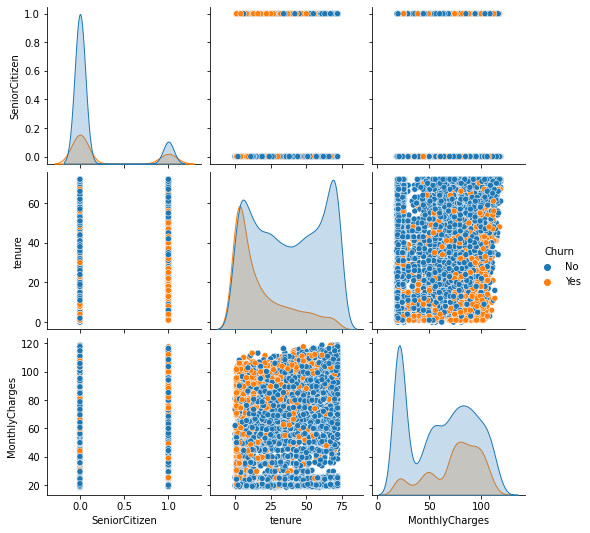

In [16]:
plt.figure(figsize = (20, 8));
sns.pairplot(df, hue = "Churn");

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Extract the target variable

In [18]:
X = df.drop("Churn", axis = 1)

In [20]:
y = df["Churn"]

## Model and evaluation

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30) 

In [22]:
lr = LogisticRegression(max_iter=400)
lr.fit(X_train, y_train);

In [23]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7761476573592049

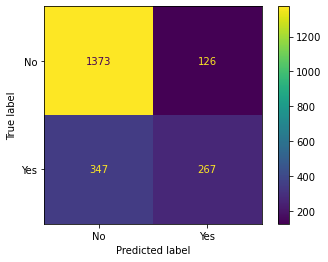

In [24]:
plot_confusion_matrix(lr, X_test, y_test);

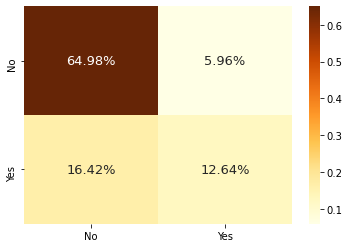

In [25]:
cnfmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_test), index = np.unique(y_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

If we normalize, te accuracy is lower

## Even a simple model will give us more than 70% accuracy. Why?

The classification of the data is just between 2 values (yes and no), so even if you try to split them randomly you're going to have a 50% of chances of doing it right.

## Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points.

In [36]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [51]:
X_train_sm, y_train_sm =smote.fit_resample(X_train,y_train)


In [38]:
y_train.value_counts()

No     3675
Yes    1255
Name: Churn, dtype: int64

In [46]:
y_train_sm.value_counts()

No     3675
Yes    3675
Name: Churn, dtype: int64

In [52]:
lr.fit(X_train_sm,y_train_sm)

LogisticRegression(max_iter=400)

In [53]:
y_pred_sm=lr.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_sm)

0.7160435399905348

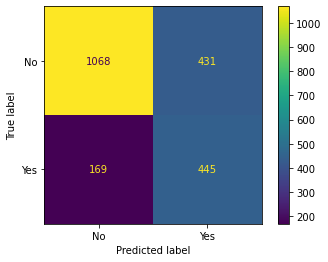

In [55]:
plot_confusion_matrix(lr, X_test, y_test);

Accuracy of the model has decreased, but the confusion matrix shows that the predictions are more balanced and therefore are more representatives.

## Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [61]:
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy="majority")

In [62]:
X_train_tk, y_train_tk =tomek.fit_resample(X_train,y_train)

In [63]:
y_train.value_counts()

No     3675
Yes    1255
Name: Churn, dtype: int64

In [64]:
y_train_sm.value_counts()

No     3675
Yes    3675
Name: Churn, dtype: int64

In [65]:
y_train_tk.value_counts()

No     3353
Yes    1255
Name: Churn, dtype: int64

In [66]:
lr.fit(X_train_tk,y_train_tk)

LogisticRegression(max_iter=400)

In [67]:
y_pred_sm=lr.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred_sm)

0.7662091812588736

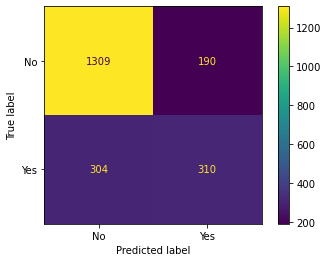

In [69]:
plot_confusion_matrix(lr, X_test, y_test);

Even if the accuracy is higher than the one obtained with the smote method, we can see that the values are still imbalanced, so the predictions aren't so relevant as the one obtained with the smote method. However, it is a bit more balance than if we don't follow any of these 2 methods.